In [ ]:
using LaTeXStrings 

include("longbonds.jl")

using .LongBondsCT


┌ Info: Precompiling Parameters [d96e819e-fc66-5662-9728-84c9c7592b0a]
└ @ Base loading.jl:1278
┌ Info: Precompiling Roots [f2b01f46-fcfa-551c-844a-d8ac1e96c665]
└ @ Base loading.jl:1278
┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1278


In [121]:
pgfplotsx()

Plots.PGFPlotsXBackend()

In [122]:
function do_c_plot(sol)
    f = plot(sol.b, sol.css, line=(2, :dash,), color=2,
        xlabel="\$b\$", ylabel="\$c\$"); 
    plot!(f, sol.b, sol.c, line=(2), color=1, legend=false)
    plot!(f, size=(300,200))
    vline!(f, [sol.b̲, sol.b̅, sol.bI], line=(1,  :gray))

    return f 
end


function do_q_plot(sol)
    f = plot(sol.b, sol.q, line=(2), color=1, legend=false, 
        xlabel="\$b\$", ylabel="\$q\$")
    hline!(f, [sol.m.q̲], line=(1, :dash, :gray))
    plot!(f, size=(300,200))
    vline!(f, [sol.b̲, sol.b̅, sol.bI], line=(1, :gray))
    return f
end


function do_v_plot(sol)
    f = plot(sol.b, sol.vss, line=(2, :dash), color=2,
        xlabel="\$b\$", ylabel="\$v\$")
    plot!(f, size=(300,200))
    vline!(f, [sol.b̲, sol.b̅, sol.bI], line=(1,  :gray))
    for v in [sol.m.v̅, sol.m.v̲]
        plot!(f, sol.b, [v for b in sol.b], 
            line=(1, :dash, :gray))
    end
    plot!(f, sol.b, sol.v, line=(2), color=1, legend=false)
    return f 
end

do_v_plot (generic function with 1 method)

In [123]:
figs = []
mypush!(f) = (push!(figs, f);f);

In [124]:
m = LongBondModel()

ModelLB{typeof(log),typeof(exp)}
  r: Float64 0.05
  δ: Float64 0.2
  λ: Float64 0.2
  τₗ: Float64 0.05
  τₕ: Float64 0.3
  y: Float64 1.0
  u: log (function of type typeof(log))
  inv_u: exp (function of type typeof(exp))
  ρ: Float64 0.05
  v̲: Float64 -7.133498878774649
  v̅: Float64 -1.0258658877510114
  b̲: Float64 1.0000000000000009
  q̲: Float64 0.5555555555555556
  b̅: Float64 5.7143097428656935


In [125]:
sol = solve_equilibrium(m);
eff = solve_efficient(m);

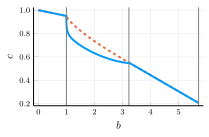

In [126]:
mypush!(do_c_plot(sol))

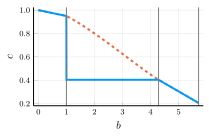

In [127]:
mypush!(do_c_plot(eff))

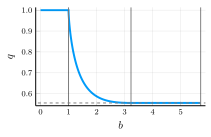

In [128]:
mypush!(do_q_plot(sol))

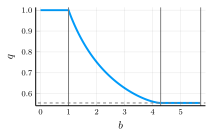

In [129]:
mypush!(do_q_plot(eff))

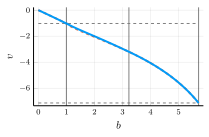

In [130]:
do_v_plot(sol)

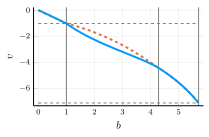

In [131]:
do_v_plot(eff)

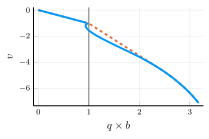

In [132]:
bindex = findlast(b -> b < sol.b̲, sol.b)

f = plot([q * b for (q, b) in zip(eff.q, eff.b)], eff.v, line=(2, :dash), color=2, legend=false)
plot!(f, [q * b for (q, b) in zip(sol.q[1:bindex], sol.b[1:bindex])], sol.v[1:bindex], line=(2), color=1)
plot!(f, [q * b for (q, b) in zip(sol.q[bindex+1:end], sol.b[bindex+1:end])], sol.v[bindex+1:end], line=(2), color=1)
plot!(f, size=(300,200), xlabel="\$ q\\times b\$", ylabel="\$v\$")
vline!(f, [sol.b̲], line=(1,  :gray))
mypush!(f)

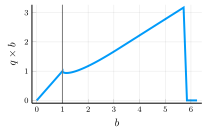

In [133]:
diff = sol.b[end] - sol.b[end-1]
f = plot(
    vcat(
        sol.b, 
        [sol.b[end] + i * diff for i in range(1, 4, step=1)]
        ), 
    vcat(
        [q * b for (q, b) in zip(sol.q, sol.b)], 
        [0.0 for i in range(1, 4, step=1)]
        ), 
    line=(2), 
    color=1)
plot!(f, legend=false)
plot!(f, size=(300,200), ylabel="\$q\\times b\$", xlabel="\$b\$")
vline!(f, [sol.b̲], line=(1,  :gray))
mypush!(f)

In [134]:
m2 = ModelLB(δ=3.0)
eqm2 = solve_equilibrium(m2);
eff2 = solve_efficient(m2);

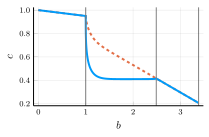

In [135]:
do_c_plot(eqm2)

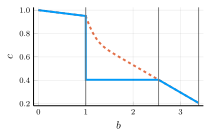

In [136]:
do_c_plot(eff2)

In [137]:
m3 = ModelLB(δ=0.001)
eqm3 = solve_equilibrium(m3);
eff3 = solve_efficient(m3);

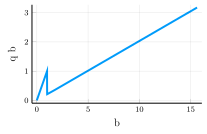

In [138]:
f = plot(eqm3.b, [q * b for (q, b) in zip(eqm3.q, eqm3.b)], line=(2), color=1)
plot!(f, legend=false)
plot!(f, size=(300,200), ylabel="q b", xlabel="b")
f

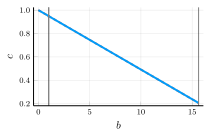

In [139]:
do_c_plot(eqm3)

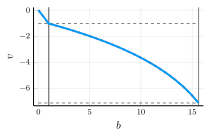

In [140]:
do_v_plot(eqm3)

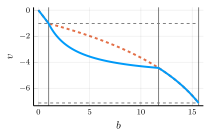

In [141]:
do_v_plot(eff3)

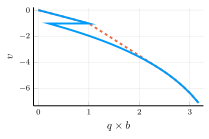

In [142]:
f = plot([q * b for (q, b) in zip(eff3.q, eff3.b)], eff3.v, line=(2, :dash), color=2, legend=false)
plot!(f, [q * b for (q, b) in zip(eqm3.q, eqm3.b)], eqm3.v, line=(2), color=1)
plot!(f, size=(300,200), xlabel="\$q \\times b\$", ylabel="\$v\$")
f

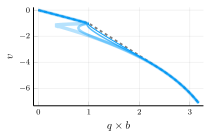

In [143]:
eff = solve_efficient(ModelLB(δ=0.1))
f = plot([q*b for (q, b) in zip(eff.q, eff.b)], eff.v, legend=false, line=(2, :dash, :gray))
for (δ, w) in zip((0.02, 0.1, 0.3, 0.7), (3.5, 2.5, 1.5, 1.))
    sol = solve_equilibrium(ModelLB(δ=δ))
    bindex = findlast(b -> b < sol.b̲, sol.b)
    plot!(f, [q * b for (q, b) in zip(sol.q[1:bindex], sol.b[1:bindex])], sol.v[1:bindex], line=(w), alpha=1/w, color=1)
    plot!(f, [q * b for (q, b) in zip(sol.q[bindex+1:end], sol.b[bindex+1:end])], sol.v[bindex+1:end], line=(w), alpha=1/w, color=1)
end
plot!(f, size=(300,200), xlabel="\$q \\times b\$", ylabel="\$v\$")
mypush!(f)

In [144]:
for (index, f) in enumerate(figs)
    savefig(f, "figures/fig_LTB_ODE_" * string(index) * ".pdf")
end